TL:DR:
- overall good
- some kwargs of functions do not have a standard parameter. It is convention in Julia that they ALWAYS have to !! Either move the kwargs into the models or make them a normal argument or give them standard values
- if models do not contain any parameters, change to `Val`
- it seems that BerryRobnik, etc have some parameters. Then move them from the function arguemnts into the Model structs. This way people do not have to remember function argument order
- dot syntax with the methods `level_spacing_pdf`, etc would be nice, but the vectorized argument works as well

In [1]:
import Pkg; Pkg.activate(@__DIR__)

  Activating project at `~/MEGA/phd/Julia/SpectralStatistics.jl/notebooks/models`


In [9]:
import SpectralStatistics
s = SpectralStatistics

using Plots

In [14]:
# make dot syntax work with models
# level_spacing_pdf.(GOE(), x)
#Base.length(::Model) = 1
#Base.iterate(::Model) = nothing

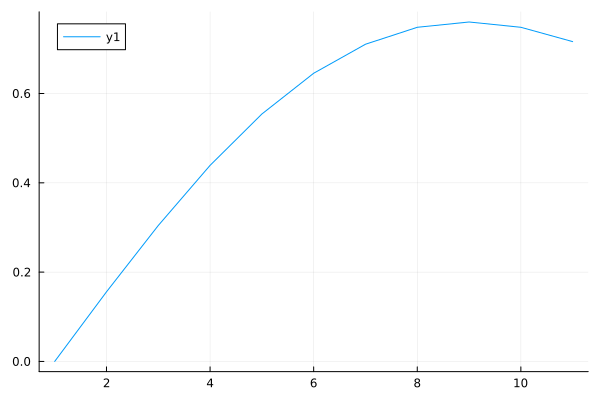

In [13]:
plot([s.level_spacing_pdf(s.GOE(), x) for x in 0:0.1:1];
)

## changing models  to `Val` types

In [27]:
using SpecialFunctions

In [28]:
function level_spacing_pdf(::Val{:GOE}, s; n=1)
    #Wigner surmises for higher orders Wen-Jia Rao
    beta = 1.0 #level repulsion
    a = 0.5*n*(n+1.0)*beta + n -1
    A =  (gamma(0.5*a + 1.0)/gamma(0.5*a + 0.5) )^2.0 
    C = (2.0*(gamma(0.5*a + 1.0))^(a + 1.0)) / ((gamma(0.5*a + 0.5))^(a + 2.0))
    return @. C * s^a * exp(-A * s^2.0)
end

level_spacing_pdf (generic function with 2 methods)

In [29]:
function level_spacing_pdf(::Val{:GUE}, s; n=1)
    #Wigner surmises for higher orders Wen-Jia Rao
    beta = 2.0 #level repulsion
    a = 0.5*n*(n+1.0)*beta + n -1
    A =  (gamma(0.5*a + 1.0)/gamma(0.5*a + 0.5) )^2.0 
    C = (2.0*(gamma(0.5*a + 1.0))^(a + 1.0)) / ((gamma(0.5*a + 0.5))^(a + 2.0))
    return @. C * s^a * exp(-A * s^2.0)
end

level_spacing_pdf (generic function with 2 methods)

In [30]:
vGOE = Val(:GOE)
vGUE = Val(:GUE)

Val{:GUE}()

In [31]:
level_spacing_pdf(vGOE, 1)

0.7161859363405692

In [32]:
level_spacing_pdf(vGUE, 1)

0.9075892109166814

In [34]:
# kwargs ALWAYS have standard arguments, otherwise they are not kwargs!!
level_spacing_pdf(s.BerryRobnik(), 1)

MethodError: MethodError: no method matching level_spacing_pdf(::SpectralStatistics.BerryRobnik, ::Int64)
Closest candidates are:
  level_spacing_pdf(!Matched::Val{:GOE}, ::Any; n) at ~/MEGA/phd/Julia/SpectralStatistics.jl/notebooks/models/nb.ipynb:1
  level_spacing_pdf(!Matched::Val{:GUE}, ::Any; n) at ~/MEGA/phd/Julia/SpectralStatistics.jl/notebooks/models/nb.ipynb:1